Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).
2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 
2.4 Final Model: Compare all the models and write an inference which model is best/optimized.
2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

In [480]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [481]:
df = pd.read_csv('insurance_part2_data.csv')

In [482]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


The dataset consists of 3000 observations where datatypes are 2 float, 2 int, 6 objects

In [307]:
df.shape

(3000, 10)

The dataset has 3000 rows and 10 columns

In [308]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no missing values in the dataset

In [309]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


The observed values in duration is negative. The mean and median for commission and sales varies significantly

In [310]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [311]:
df.drop_duplicates(inplace=True)

In [243]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [244]:
df.shape

(2861, 10)

The duplicated varibales are now removed from the dataset, we have now 2861 rows and 10 columns

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


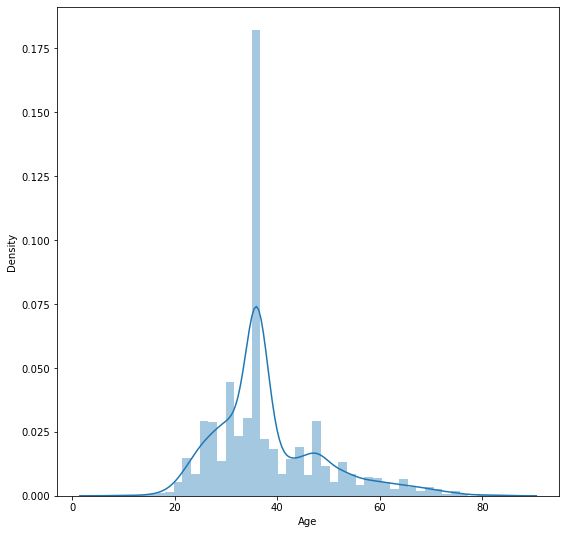

In [138]:
plt.figure(figsize=(9,9))
sns.distplot(df['Age'])
plt.show()

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


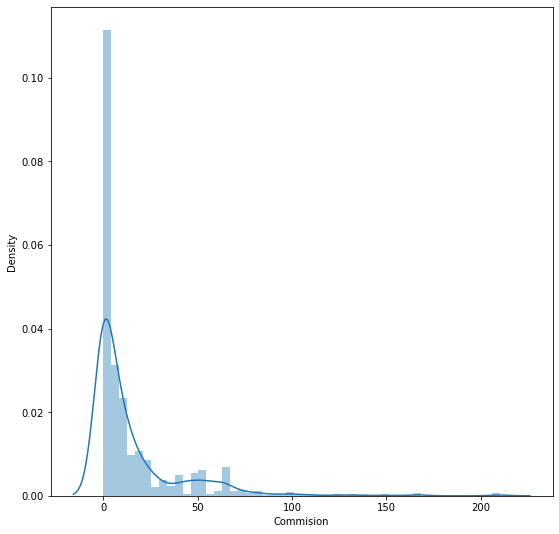

In [139]:
plt.figure(figsize=(9,9))
sns.distplot(df['Commision'])
plt.show()

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


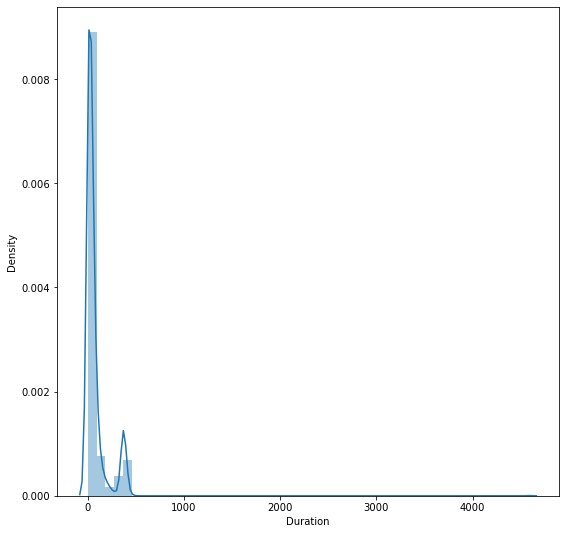

In [140]:
plt.figure(figsize=(9,9))
sns.distplot(df['Duration'])
plt.show()

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


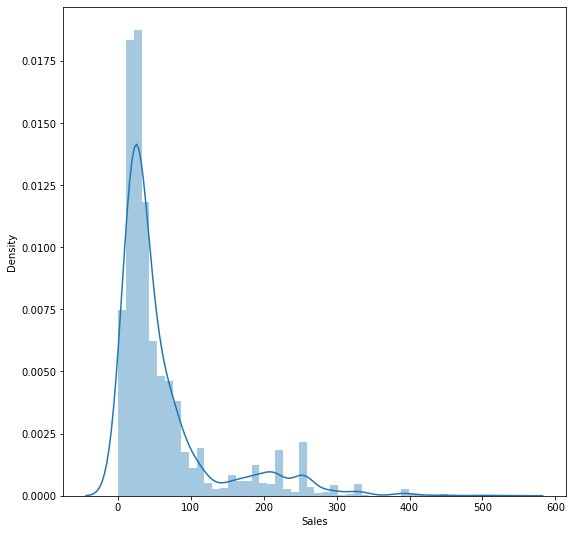

In [141]:
plt.figure(figsize=(9,9))
sns.distplot(df['Sales'])
plt.show()

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

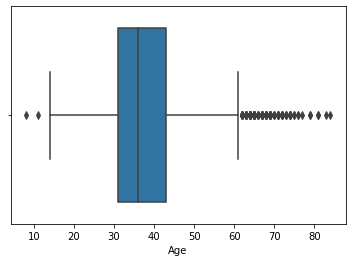

In [142]:
sns.boxplot(df['Age'])

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Commision'>

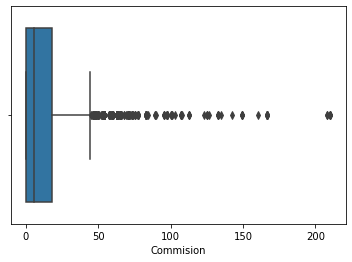

In [143]:
sns.boxplot(df['Commision'])

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

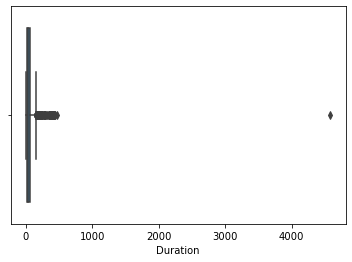

In [144]:
sns.boxplot(df['Duration'])

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

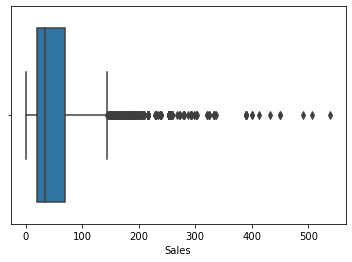

In [145]:
sns.boxplot(df['Sales'])

In [146]:
df.skew().sort_values(ascending=False)

Duration     13.786096
Commision     3.104741
Sales         2.344643
Age           1.103145
dtype: float64

As we see there are outliers present in all 4 varibales lets treat them

In [312]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [313]:
lrAge,urAge=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>urAge,urAge,df['Age'])
df['Age']=np.where(df['Age']<lrAge,lrAge,df['Age'])


lrcommision,urcommision=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>urcommision,urcommision,df['Commision'])
df['Commision']=np.where(df['Commision']<lrcommision,lrcommision,df['Commision'])

lrduration,urduration=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>urduration,urduration,df['Duration'])
df['Duration']=np.where(df['Duration']<lrduration,lrduration,df['Duration'])

lrsales,ursales=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>ursales,ursales,df['Sales'])
df['Sales']=np.where(df['Sales']<lrsales,lrsales,df['Sales'])


<AxesSubplot:>

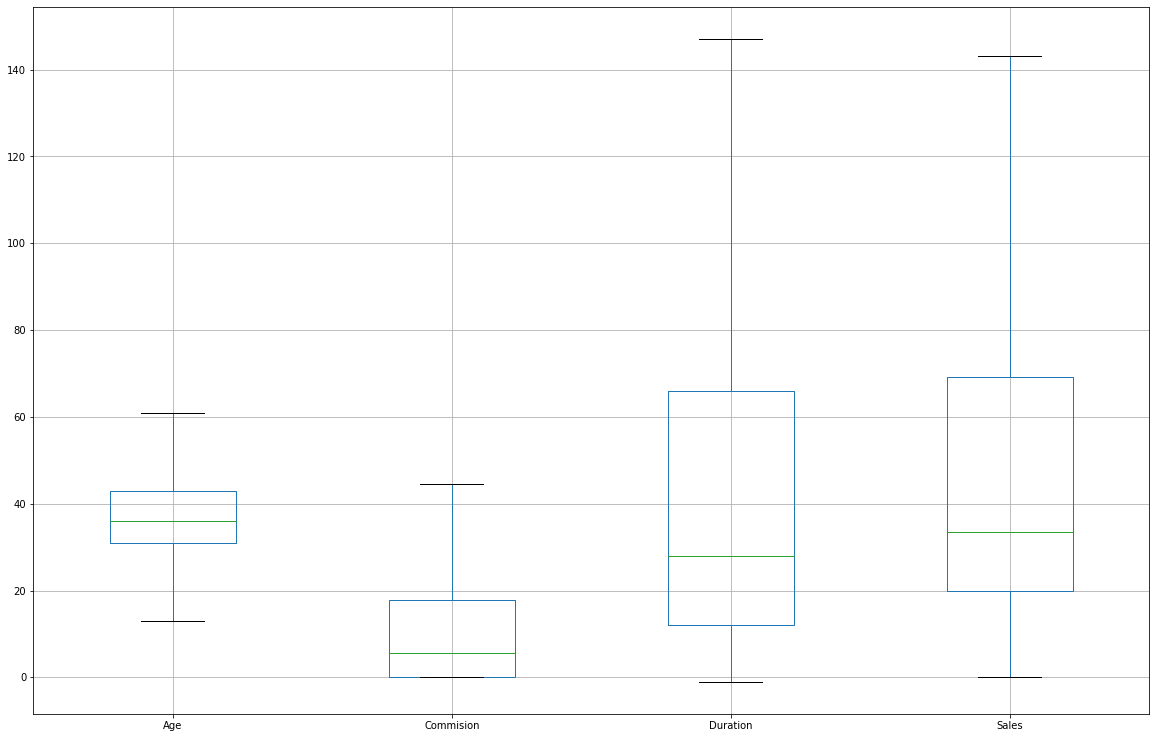

In [150]:
df.boxplot(figsize=(20,13))

In [ ]:
The outliers is been treated

<AxesSubplot:xlabel='Type', ylabel='count'>

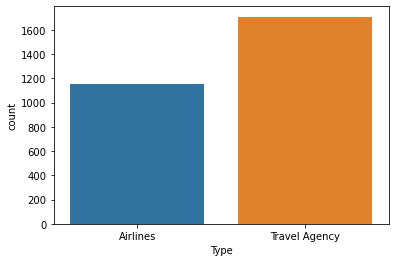

In [151]:
sns.countplot(x= 'Type', data= df)

<AxesSubplot:xlabel='Type', ylabel='Sales'>

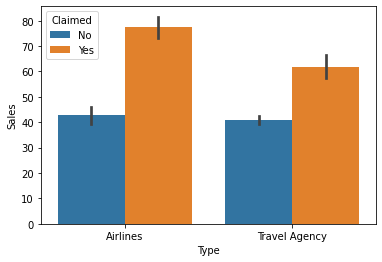

In [152]:
sns.barplot(x='Type',y='Sales',data= df, hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

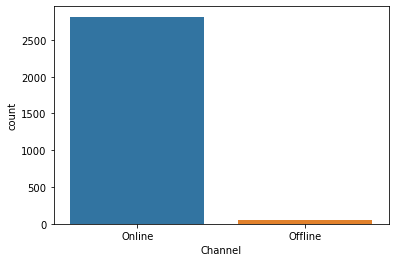

In [153]:
sns.countplot(x= 'Channel', data= df)

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

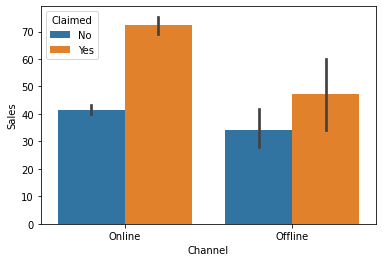

In [154]:
sns.barplot(x='Channel',y='Sales',data= df, hue='Claimed')

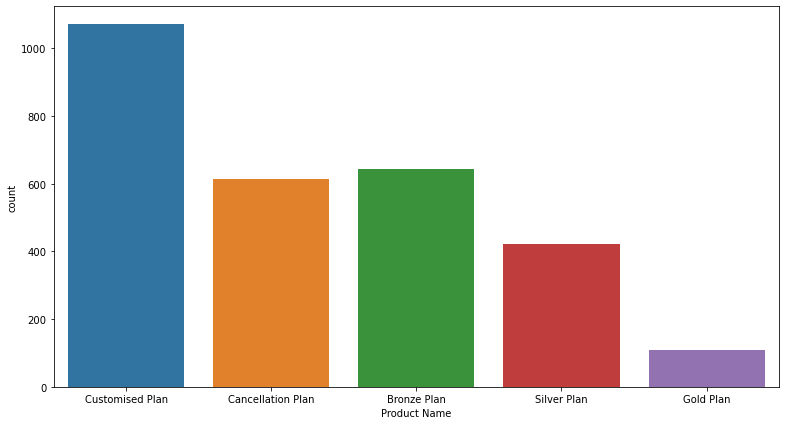

In [155]:
plt.figure(figsize=(13,7))
sns.countplot(x= 'Product Name', data= df)
plt.show()

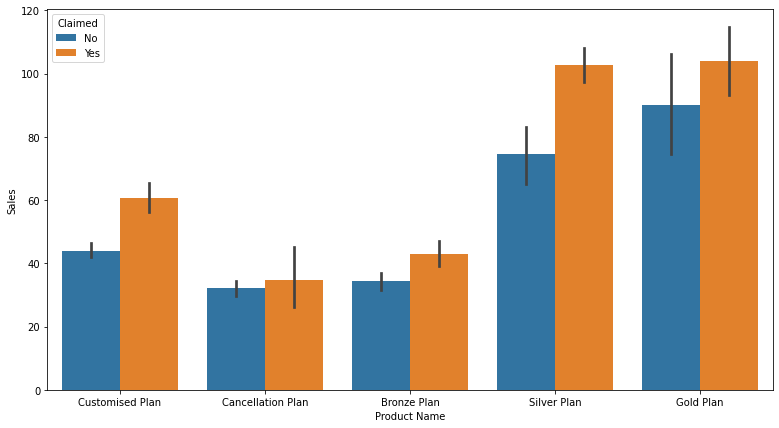

In [156]:
plt.figure(figsize=(13,7))
sns.barplot(x='Product Name',y='Sales',data= df, hue='Claimed')
plt.show()

<AxesSubplot:xlabel='Destination', ylabel='count'>

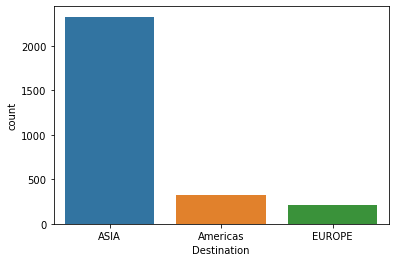

In [157]:
sns.countplot(x= 'Destination', data= df)

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

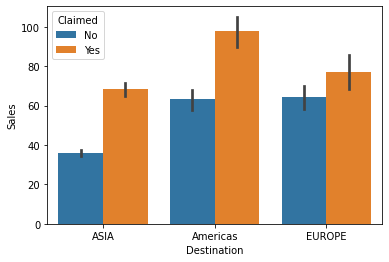

In [158]:
sns.barplot(x='Destination',y='Sales',data= df, hue='Claimed')

Bivariate Analysis:

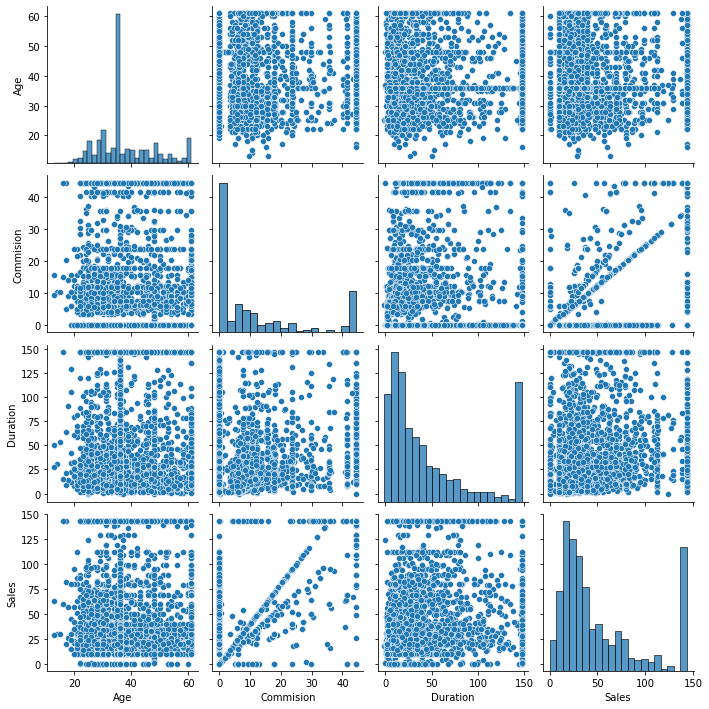

In [159]:
sns.pairplot(df[['Age','Commision','Duration','Sales']])

In [160]:
corr=df.corr().T
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.071246,0.009216,0.021450
Commision,0.071246,1.000000,0.453225,0.682537
Duration,0.009216,0.453225,1.000000,0.534512
Sales,0.021450,0.682537,0.534512,1.000000


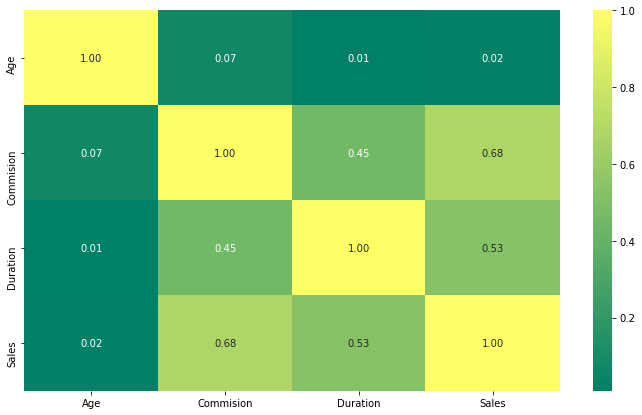

In [161]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot= True, fmt='.2f', cmap='summer')
plt.show()

Convert objects to categorical codes

In [314]:
for feature in df.columns:
    if df[feature].dtype=='object':
        df[feature]=pd.Categorical(df[feature]).codes

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 128.5 KB


In [316]:
# propotions of 1's and 0's
df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.
7

In [249]:
# use target column (Claimed), for seperate vectors test and training
X= df.drop('Claimed', axis=1)
y= df.pop('Claimed')

In [371]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [385]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [386]:
X_train,X_test,train_labels,test_labels=train_test_split(X,y,test_size=.30,random_state=3)

In [387]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [388]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=150, random_state=1)

In [391]:
from sklearn import tree

In [392]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [393]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.174976
Agency_Code   0.204343
Type          0.001882
Commision     0.079623
Channel       0.002774
Duration      0.223499
Sales         0.230417
Product Name  0.059610
Destination   0.022875


In [400]:
#Predicting on Training and Test dataset
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [402]:
#Getting the Predicted Classes and Probs
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.923077,0.076923
2,0.480392,0.519608
3,0.633663,0.366337
4,0.842105,0.157895


AUC: 0.820


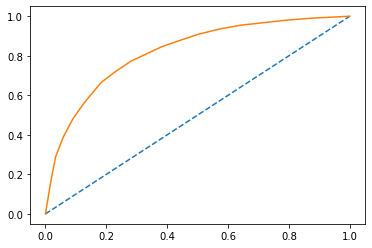

In [404]:
# CART # AUC for training Data
probs= best_grid.predict_proba(X_train)
probs = probs[:,1]
# Calculate auc curve
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()




AUC: 0.789


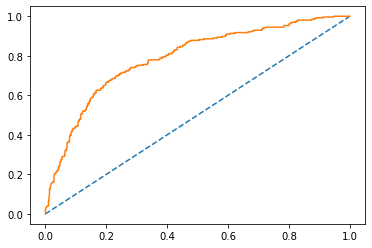

In [486]:
# CART # AUC and ROC for test Data
probs = best_grid.predict_proba(X_test)
probs = probs[:,1]
# Calculate auc curve

cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve

cart_test_fpr,cart_test_tpr,cart_test_thresholds= roc_curve(test_labels,probs)
plt.plot([0,1],[0,1],linestyle='--')

#plot the roc curve for the model
plt.plot(cart_test_fpr,cart_test_tpr)

plt.show()

In [416]:
confusion_matrix(train_labels, ytrain_predict)

array([[1173,  169],
       [ 291,  369]], dtype=int64)

In [417]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7702297702297702

In [412]:
from sklearn.metrics import classification_report, confusion_matrix

In [413]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1342
           1       0.69      0.56      0.62       660

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.76      2002



In [419]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.56
cart_train_f1  0.62


In [420]:
#Confusion Matrix for test data
confusion_matrix(test_labels, ytest_predict)

array([[516,  89],
       [122, 132]], dtype=int64)

In [421]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7543655413271245

In [414]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       605
           1       0.60      0.52      0.56       254

    accuracy                           0.75       859
   macro avg       0.70      0.69      0.69       859
weighted avg       0.75      0.75      0.75       859



In [423]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_f1=round(df.loc["1"][2],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_precision=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.6
cart_test_recall  0.52
cart_test_f1  0.56


Cart Conclusion:
cart_train_precision  0.69
cart_train_recall  0.56
cart_train_f1  0.62

cart_test_precision  0.6
cart_test_recall  0.52
cart_test_f1  0.56

The train and test data are almost similar, the model seems okay. 


Ensemble Random Forest

In [447]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [456]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [457]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [458]:
best_grid = grid_search.best_estimator_

In [459]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

In [461]:
# Predict train and test data for RF model
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [462]:
#RF Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict)

array([[1199,  143],
       [ 249,  411]], dtype=int64)

In [464]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8041958041958042

In [465]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1342
           1       0.74      0.62      0.68       660

    accuracy                           0.80      2002
   macro avg       0.78      0.76      0.77      2002
weighted avg       0.80      0.80      0.80      2002



In [466]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.62
rf_train_f1  0.68


Area under Curve is 0.8707638982974303


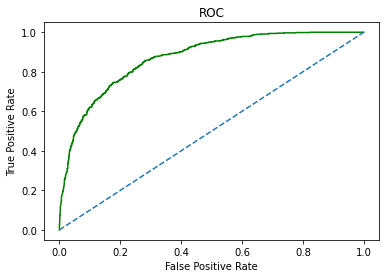

In [467]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [468]:
#Evaluating model performance on the test data
confusion_matrix(test_labels,ytest_predict)

array([[518,  87],
       [112, 142]], dtype=int64)

In [469]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7683352735739232

In [470]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       605
           1       0.62      0.56      0.59       254

    accuracy                           0.77       859
   macro avg       0.72      0.71      0.71       859
weighted avg       0.76      0.77      0.76       859



In [471]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.62
rf_test_recall  0.56
rf_test_f1  0.59


Area under Curve is 0.7885078414784928


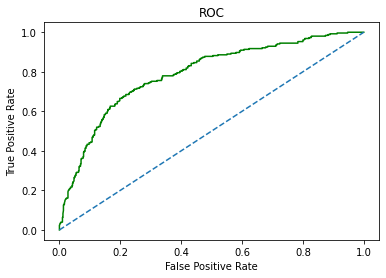

In [472]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [473]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.378198
Sales         0.193812
Product Name  0.182063
Duration      0.089622
Age           0.067383
Commision     0.061467
Type          0.018426
Destination   0.008378
Channel       0.000651


Random Forest Conclusion:
rf_test_precision  0.62
rf_test_recall  0.56
rf_test_f1  0.59


rf_train_precision  0.74
rf_train_recall  0.62
rf_train_f1  0.68

Test seems to be performing better here , could be overfitting, however with overall can be considered as good model

ANN model

In [296]:
from sklearn.model_selection import train_test_split

In [318]:
X= df.drop('Claimed', axis=1)
y= df.pop('Claimed')

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=0)

In [320]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (2002, 9)
X_test:  (859, 9)
y_train:  (2002,)
y_test:  (859,)


In [321]:
from sklearn.preprocessing import StandardScaler

In [322]:
sc=StandardScaler()

In [323]:
X_train= sc.fit_transform(X_train)

In [324]:
X_train

array([[-0.19158362,  0.7144367 ,  0.82092207, ..., -0.96653588,
        -0.52656514, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.82602536,
        -0.52656514, -0.44760203],
       [-0.60378182,  0.7144367 ,  0.82092207, ..., -0.73235168,
         0.25896646, -0.44760203],
       ...,
       [-1.11902955, -1.27762775, -1.21814243, ...,  0.5416104 ,
         1.83002967, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.94311746,
        -0.52656514, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ...,  0.8366825 ,
         0.25896646, -0.44760203]])

In [325]:
X_test=sc.transform(X_test)

In [326]:
X_test

array([[ 0.63281276, -1.27762775, -1.21814243, ...,  2.15396865,
        -1.31209675, -0.44760203],
       [ 0.83891185, -0.28159552,  0.82092207, ..., -0.96887773,
         0.25896646,  1.25600874],
       [ 0.22061457, -1.27762775, -1.21814243, ...,  0.70788118,
         1.83002967, -0.44760203],
       ...,
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.24056485,
         0.25896646, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.70893326,
         0.25896646, -0.44760203],
       [-1.01598001, -1.27762775, -1.21814243, ..., -0.76747931,
         1.83002967, -0.44760203]])

Building Neural Network Model

In [328]:
from sklearn.neural_network import MLPClassifier

In [329]:

clf= MLPClassifier(hidden_layer_sizes=100, max_iter=5000,solver='sgd',verbose='True',random_state=21,tol=0.01)

In [331]:
# fit the model on training data
clf.fit(X_train, y_train)

Iteration 1, loss = 0.64707399
Iteration 2, loss = 0.62876798
Iteration 3, loss = 0.60902482
Iteration 4, loss = 0.59133478
Iteration 5, loss = 0.57673463
Iteration 6, loss = 0.56620029
Iteration 7, loss = 0.55818125
Iteration 8, loss = 0.55077651
Iteration 9, loss = 0.54460476
Iteration 10, loss = 0.53956499
Iteration 11, loss = 0.53445513
Iteration 12, loss = 0.52964941
Iteration 13, loss = 0.52554336
Iteration 14, loss = 0.52198980
Iteration 15, loss = 0.51891499
Iteration 16, loss = 0.51649951
Iteration 17, loss = 0.51471758
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose='True')

In [439]:
#Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [427]:
# evalaute performance based on training data
confusion_matrix(train_labels,ytrain_predict)

array([[1173,  169],
       [ 291,  369]], dtype=int64)

In [428]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7702297702297702

In [429]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1342
           1       0.69      0.56      0.62       660

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.76      2002



In [430]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.56
nn_train_f1  0.62


Area under Curve is 0.8203862394436165


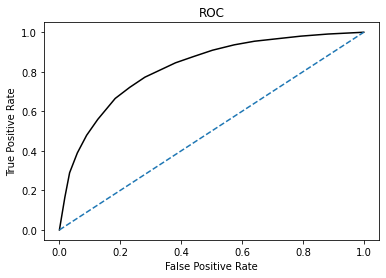

In [431]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [ ]:
#NN Model Performance Evaluation on Test data

In [432]:
confusion_matrix(test_labels,ytest_predict)

array([[516,  89],
       [122, 132]], dtype=int64)

In [433]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7543655413271245

In [434]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       605
           1       0.60      0.52      0.56       254

    accuracy                           0.75       859
   macro avg       0.70      0.69      0.69       859
weighted avg       0.75      0.75      0.75       859



In [435]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.6
nn_test_recall  0.52
nn_test_f1  0.56


Area under Curve is 0.7674952820980022


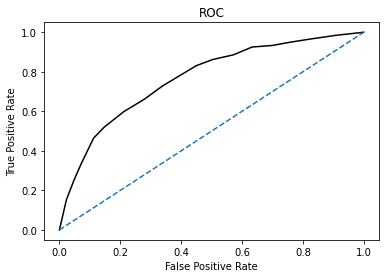

In [436]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [437]:
best_grid.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=150, random_state=1)>

In [351]:
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=5000, random_state=1, tol=0.01)

2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

In [487]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.75,0.80,0.77,0.77,0.75
AUC,0.77,0.79,0.87,0.79,0.82,0.77
Recall,0.56,0.52,0.62,0.56,0.56,0.52
Precision,0.69,0.60,0.74,0.62,0.69,0.60
F1 Score,0.62,0.56,0.68,0.59,0.62,0.56


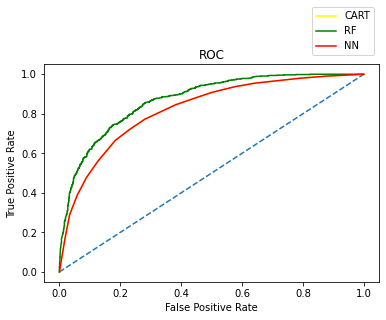

In [478]:
#ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='yellow',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='red',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

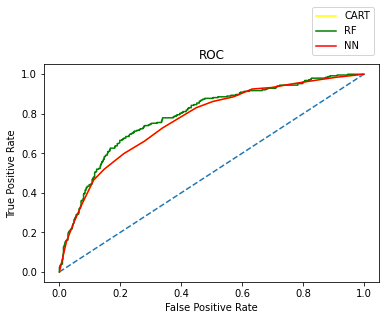

In [479]:
#ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='yellow',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='red',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

Random Forest seems to performing best of the 3 models, with better accuracy, precision, recall and F1 score

As we see the maximum insurance is booked thorugh online channel and very few from offline channel.Customers are benefitting from the source however it can be seen offline has claims associated with it. Recommedend to run promotional campigns for other areas so project sales can be boosted. As noticed the claimed is higher on gold plan however cutomized plan shows higher count, as well as for the destination Asia seems to have a higher count however claimed is from other regions.

We would need to collect more data on real time basis.

Recomended:
1. Marketing offers to launch new campaigns
2. Reduce Claim cycle
3. optimize claim recovery
4. Reduce claim handling
5. Increase customer satisfaction